In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

In [3]:
# reads in a file separated by multiple spaces.
# So, sep='\s+' is needed. 
df_hip = pd.read_csv( \
'http://bogotobogo.com/python/images/python_Pandas_NumPy_Matplotlib/HIP_star.dat',\
                     sep='\s+')

In [4]:
df_hip.shape

(2720, 9)

In [5]:
# check if a column has no data (or NaN)
df_hip.isnull().sum()

HIP       0
Vmag      1
RA        1
DE        1
Plx       1
pmRA      1
pmDE      1
e_Plx     1
B-V      42
dtype: int64

In [6]:
# drop any row if any of the column is missing data
df_hip = df_hip.dropna()

In [7]:
# check if a column has no data (or NaN) again
df_hip.isnull().sum()

HIP      0
Vmag     0
RA       0
DE       0
Plx      0
pmRA     0
pmDE     0
e_Plx    0
B-V      0
dtype: int64

In [8]:
df_hip.shape

(2678, 9)

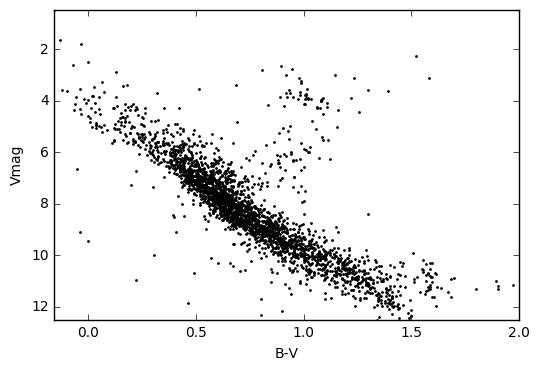

In [9]:
x = df_hip.iloc[:,8].values 
y = df_hip.iloc[:,1].values
fig = figure()
ax = fig.add_subplot(111)
ax.set_xlabel('B-V')
ax.set_ylabel('Vmag')
scatter(x,y,s=1) # marker size
ylim([y.min(axis=0),y.max(axis=0)]) # x-axis range
xlim([x.min(axis=0),2]) # x-axis range
gca().invert_yaxis()  # y-axis reversed
show()

In [10]:
# The lines below are just for exercise 
# to check data and manipulating numpy arrays

In [11]:
df_hip[:5]

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068


In [ ]:
# DBSCAN

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from numpy.random import RandomState
import pylab as pl

In [13]:
XX = df_hip.iloc[:,:].values 
XX.shape, XX

((2678, 9), array([['2', 9.27, 0.003797, ..., -0.93, 3.1, 0.9990000000000001],
        ['38', 8.65, 0.111047, ..., -62.4, 0.78, 0.778],
        ['47', 10.78, 0.135192, ..., -145.9, 1.97, 1.15],
        ..., 
        ['118251', 8.16, 359.778318, ..., 3.56, 0.82, 0.652],
        ['118254', 7.72, 359.787381, ..., 4.4, 0.8, 0.563],
        ['118311', 11.85, 359.954685, ..., -112.81, 2.96, 1.391]], dtype=object))

In [14]:
Xnew = XX[:,[8,1]]
XX.shape, XX,Xnew

((2678, 9), array([['2', 9.27, 0.003797, ..., -0.93, 3.1, 0.9990000000000001],
        ['38', 8.65, 0.111047, ..., -62.4, 0.78, 0.778],
        ['47', 10.78, 0.135192, ..., -145.9, 1.97, 1.15],
        ..., 
        ['118251', 8.16, 359.778318, ..., 3.56, 0.82, 0.652],
        ['118254', 7.72, 359.787381, ..., 4.4, 0.8, 0.563],
        ['118311', 11.85, 359.954685, ..., -112.81, 2.96, 1.391]], dtype=object), array([[0.9990000000000001, 9.27],
        [0.778, 8.65],
        [1.15, 10.78],
        ..., 
        [0.652, 8.16],
        [0.563, 7.72],
        [1.391, 11.85]], dtype=object))

In [15]:
X = StandardScaler().fit_transform(Xnew)
X.shape, X

/home/k/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


((2678, 2), array([[ 0.74646047,  0.56791503],
        [ 0.05177198,  0.2342337 ],
        [ 1.22111189,  1.38059052],
        ..., 
        [-0.34429476, -0.02948219],
        [-0.62405619, -0.26628829],
        [ 1.97866812,  1.95645991]]))

In [16]:
# db = DBSCAN(eps=0.2, min_samples=8).fit(X)
db = DBSCAN(eps=0.20, min_samples=7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [17]:
core_samples_mask, db.core_sample_indices_

(array([ True,  True,  True, ...,  True,  True,  True], dtype=bool),
 array([   0,    1,    2, ..., 2675, 2676, 2677]))

In [18]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
unique_labels, colors

({-1, 0, 1, 2}, array([[ 0.61960787,  0.00392157,  0.25882354,  1.        ],
        [ 0.99346405,  0.74771243,  0.43529413,  1.        ],
        [ 0.74771243,  0.89803922,  0.627451  ,  1.        ],
        [ 0.36862746,  0.30980393,  0.63529414,  1.        ]]))

/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


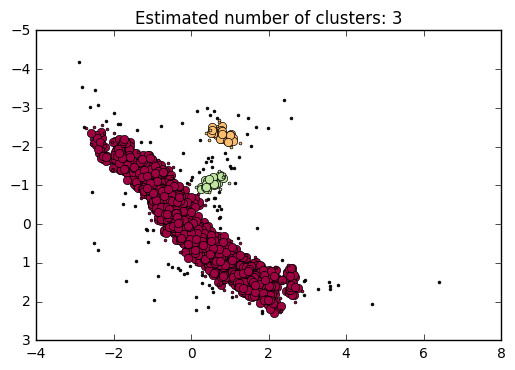

In [19]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=2)

plt.gca().invert_yaxis()  
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()